# PART 1 - PREPROCESSING

In [36]:
import sys
print("Using interpreter:", sys.executable)

# install into THIS exact interpreter
!{sys.executable} -m pip install pandas numpy scikit-learn matplotlib seaborn

Using interpreter: /opt/homebrew/opt/python@3.10/bin/python3.10


In [37]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 42

 ## Load all four city datasets

In [38]:
data_paths = {
    "Portland": "portland_listings.csv",
    "Pacific Grove": "pacificigrove_listings.csv",  # note: your file is named this
    "Albany": "albany_listing.csv",
    "Bozeman": "bozeman_listings.csv",
}

raw_data = {}

for city, path in data_paths.items():
    df = pd.read_csv(path)
    print(f"{city}: {df.shape[0]} rows, {df.shape[1]} columns")
    raw_data[city] = df

Portland: 4425 rows, 79 columns
Pacific Grove: 300 rows, 79 columns
Albany: 461 rows, 79 columns
Bozeman: 580 rows, 79 columns


 ## Define the required numeric columns

In [39]:
numeric_columns = [
    'price', 'accommodates', 'bedrooms', 'beds', 'bathrooms_text',
    'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'number_of_reviews',
    'availability_365', 'minimum_nights', 'maximum_nights'
]

## Create helper functions to clean messy fields

In [40]:
def clean_price(series):
    return (
        series.astype(str)
        .str.replace(r"[\$,]", "", regex=True)
        .replace("nan", np.nan)
        .astype(float)
    )


def clean_bathrooms(series):
    def to_float(x):
        if pd.isna(x):
            return np.nan
        x = str(x).lower().strip()
        token = x.split()[0]
        if token.startswith("half"):
            return 0.5
        try:
            return float(token)
        except:
            return np.nan
    return series.map(to_float)


## Build the preprocessing function

In [41]:
def preprocess_city(df, city_name):
    print(f"\n Preprocessing: {city_name} ")
    
    # Keep only required columns
    sub = df[numeric_columns].copy()

    # Clean special fields
    sub["price"] = clean_price(sub["price"])
    sub["bathrooms_text"] = clean_bathrooms(sub["bathrooms_text"])

    # Convert to float
    sub = sub.astype(float)

    # Fill missing with column medians
    sub = sub.fillna(sub.median())

    # Clip outliers (1st–99th percentile)
    lower = sub.quantile(0.01)
    upper = sub.quantile(0.99)
    sub = sub.clip(lower=lower, upper=upper, axis=1)

    # Standard scale
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(sub)

    return sub, X_scaled, scaler

## Run preprocessing for all four cities


In [42]:
city_processed = {}
city_scaled = {}
city_scalers = {}

for city, df in raw_data.items():
    cleaned, scaled, scaler = preprocess_city(df, city)
    city_processed[city] = cleaned
    city_scaled[city] = scaled
    city_scalers[city] = scaler


 Preprocessing: Portland 

 Preprocessing: Pacific Grove 

 Preprocessing: Albany 

 Preprocessing: Bozeman 


In [43]:
for city in city_processed:
    print(city)
    display(city_processed[city].head())

Portland


,price,accommodates,bedrooms,beds,bathrooms_text,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews,availability_365,minimum_nights,maximum_nights
0,159.0,2.0,1.0,1.0,1.0,4.89,4.87,4.87,4.84,4.79,4.95,4.69,134.0,339.0,30.0,730.0
1,130.0,2.0,1.0,1.0,1.0,5.00,5.00,5.00,4.92,5.00,5.00,4.92,25.0,214.0,30.0,300.0
2,354.0,10.0,4.0,5.0,2.0,4.92,4.94,4.99,4.95,4.97,4.79,4.82,80.0,317.0,4.0,365.0
3,76.0,3.0,1.0,2.0,1.0,4.84,4.82,4.79,4.95,4.95,4.98,4.86,138.0,361.0,30.0,365.0
4,81.0,1.0,1.0,1.0,3.5,4.52,4.58,4.36,4.83,4.73,4.84,4.46,68.0,335.0,30.0,180.0


Pacific Grove


,price,accommodates,bedrooms,beds,bathrooms_text,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews,availability_365,minimum_nights,maximum_nights
0,279.00,2.0,1.0,1.0,1.0,4.89,4.85,4.82,4.88,4.85,4.97,4.58,62.00,83.0,30.0,120.0
1,1024.21,12.0,5.0,7.0,4.0,4.94,4.92,4.96,4.97,4.95,4.98,4.78,121.00,162.0,5.0,1125.0
2,225.00,2.0,1.0,1.0,1.0,4.96,4.96,4.96,4.96,4.96,4.97,4.93,807.63,267.0,30.0,90.0
3,200.00,3.0,1.0,1.0,1.0,4.91,4.88,4.96,4.97,4.97,4.86,4.80,807.63,90.0,1.0,300.0
4,128.00,3.0,2.0,2.0,1.0,4.71,4.47,4.94,4.88,5.00,5.00,4.65,17.00,75.0,30.0,1125.0


Albany


,price,accommodates,bedrooms,beds,bathrooms_text,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews,availability_365,minimum_nights,maximum_nights
0,93.0,4.0,2.0,2.0,1.0,3.56,3.44,3.56,4.22,4.56,3.22,3.67,9.0,188.0,28.0,1125.0
1,91.0,3.0,2.0,1.0,1.0,4.74,4.88,4.87,4.85,4.81,4.81,4.77,311.0,354.0,2.0,1125.0
2,64.0,2.0,0.0,2.0,1.0,4.52,4.62,4.45,4.81,4.88,4.76,4.64,373.0,12.0,2.0,45.0
3,95.0,2.0,1.0,1.0,1.0,4.73,4.83,4.71,4.83,4.70,4.80,4.72,332.0,335.0,2.0,1125.0
4,89.0,4.0,1.0,2.0,1.0,4.79,4.86,4.82,4.95,4.93,4.87,4.77,563.0,246.0,1.0,1125.0


Bozeman


,price,accommodates,bedrooms,beds,bathrooms_text,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews,availability_365,minimum_nights,maximum_nights
0,96.0,2.0,1.0,1.0,1.0,4.98,4.98,4.95,4.97,4.99,4.93,4.94,606.0,259.0,3.0,1125.0
1,172.0,4.0,1.0,2.0,1.5,4.80,4.89,4.84,4.95,4.98,4.98,4.70,44.0,350.0,2.0,1125.0
2,200.0,2.0,1.0,1.0,1.0,4.96,5.00,5.00,4.98,4.98,5.00,4.71,52.0,364.0,3.0,7.0
3,150.0,6.0,3.0,3.0,2.0,4.78,4.87,4.76,4.91,4.82,4.89,4.73,344.0,317.0,3.0,31.0
4,489.0,4.0,2.0,2.0,1.0,4.97,4.94,4.99,4.98,5.00,5.00,4.74,70.0,362.0,3.0,10.0


# PART 2 - PCA

In [44]:
from sklearn.decomposition import PCA

## Reusable PCA function

In [45]:
def run_pca_for_city(X_scaled, city_name, n_components=None):
    """
    X_scaled: numpy array from StandardScaler
    Returns a dict with PCA object and variance info.
    """
    print(f"\n PCA for {city_name} ")
    
    # If n_components is None, sklearn will keep all components
    pca = PCA(n_components=n_components, random_state=RANDOM_STATE)
    X_pca = pca.fit_transform(X_scaled)
    
    explained_var = pca.explained_variance_ratio_
    cumulative_explained_var = explained_var.cumsum()
    
    # components needed for >= 90% variance
    n_components_90 = np.argmax(cumulative_explained_var >= 0.90) + 1
    
    print(f"  Total components: {pca.n_components_}")
    print(f"  Components for >= 90% variance: {n_components_90}")
    
    return {
        "pca": pca,
        "X_pca": X_pca,
        "explained_var": explained_var,
        "cumulative_explained_var": cumulative_explained_var,
        "n_components_90": n_components_90,
    }

## Run PCA for all four cities

In [46]:
pca_results = {}

for city, X_scaled in city_scaled.items():
    results = run_pca_for_city(X_scaled, city)
    pca_results[city] = results


 PCA for Portland 
  Total components: 16
  Components for >= 90% variance: 11

 PCA for Pacific Grove 
  Total components: 16
  Components for >= 90% variance: 10

 PCA for Albany 
  Total components: 16
  Components for >= 90% variance: 9

 PCA for Bozeman 
  Total components: 16
  Components for >= 90% variance: 10


/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/opt/homebrew/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed =

## Scree plot function

In [47]:
def plot_scree(city_name, explained_var, cumulative_explained_var):
    n_components = len(explained_var)
    xs = np.arange(1, n_components + 1)

    plt.figure(figsize=(6, 4))
    
    # bar for individual variance
    plt.bar(xs, explained_var, alpha=0.7, label="Explained variance (per PC)")
    
    # line for cumulative variance
    plt.plot(xs, cumulative_explained_var, marker="o", label="Cumulative variance")
    
    plt.axhline(0.9, color="red", linestyle="--", label="90% threshold")
    plt.xlabel("Principal Component")
    plt.ylabel("Variance Ratio")
    plt.title(f"Scree Plot - {city_name}")
    plt.legend()
    plt.tight_layout()
    plt.show()

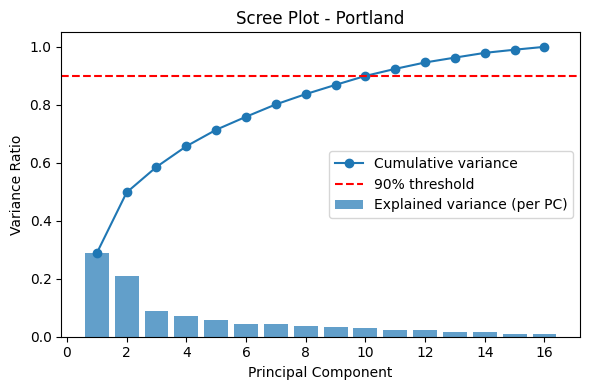

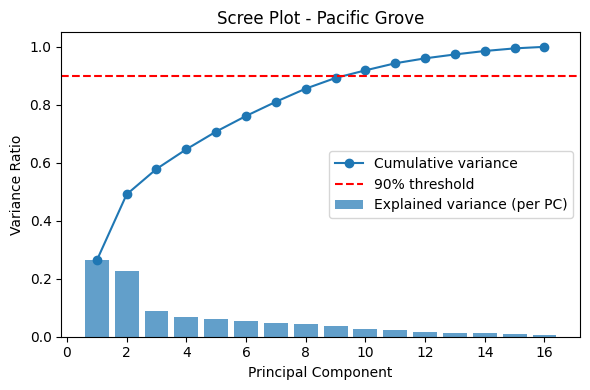

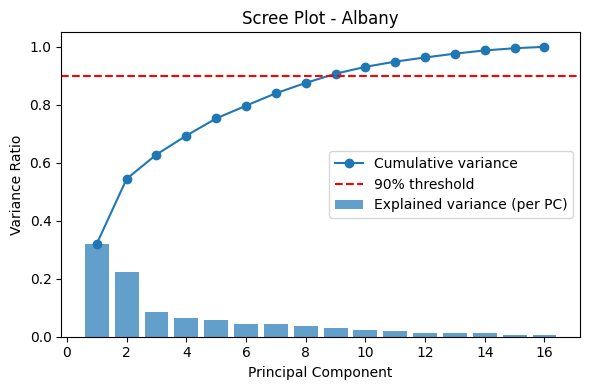

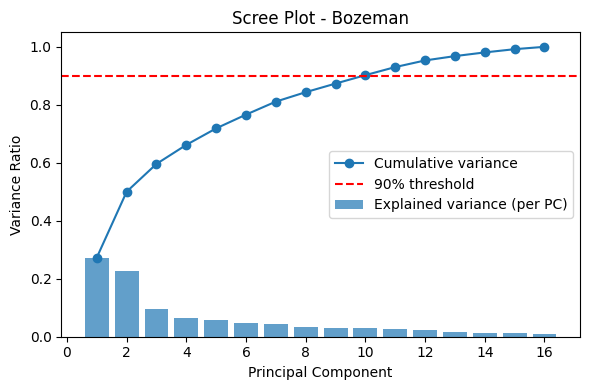

In [48]:
for city, res in pca_results.items():
    plot_scree(city, res["explained_var"], res["cumulative_explained_var"])

## Interpret the top 2 components


### Portland

PC1 mainly reflects the review quality of listings. The strongest loadings are on rating, accuracy, cleanliness, value, and communication, which suggests this component captures how positively guests evaluate a stay.
PC2 is driven by accommodates, bedrooms, beds, bathrooms, and price. This looks like a “size and capacity” dimension — larger, more expensive listings score higher on this axis.



### Pacific Grove

PC1 is again dominated by guest review metrics: rating, accuracy, check-in, and cleanliness. This first component essentially captures overall guest satisfaction and service quality.
PC2 has its highest loadings on bedrooms, beds, bathrooms, and price, making it a clear “property size and amenities” axis.



### Albany

PC1 is strongly influenced by review-related features, especially accuracy, cleanliness, rating, and value. This component summarizes how well the listing performs according to guest feedback.
PC2 shows high loadings on accommodates, bedrooms, beds, and price, which indicates it represents the physical scale and cost of the property.



### Bozeman

PC1 is dominated by review factors — rating, cleanliness, check-in, and communication show the strongest contributions. This means PC1 reflects guest perceptions and the overall quality of the experience.
PC2 has high loadings on accommodates, bedrooms, beds, bathrooms, and price, suggesting it captures the “size and capacity” dimension of the listing.



### Conclusions

Across all four cities, the PCA structure is very similar:
PC1 consistently represents guest satisfaction and review quality, while PC2 reflects the size, amenities, and price of the listing.



### Cross-City PCA Comparison 

When I compared the PCA results across all four cities, the structure ended up being surprisingly similar. In every dataset, the first principal component mostly reflects the review-related stuff - things like rating, cleanliness, accuracy, and value all move together. So PC1 basically captures how “well-liked” a listing is, regardless of which city it’s in.

The second component consistently lines up with the physical size of a listing: accommodates, bedrooms, beds, bathrooms, and even price all load heavily here. So PC2 feels like the “scale/size” axis. Even though the cities themselves are pretty different, the way the listings vary isn’t - they all seem to spread out along these same two broad dimensions: guest satisfaction and property size

In [49]:
def show_top_loadings_for_city(city_name, pca, feature_names, top_n=5):
    """
    Print the top contributing features (by absolute loading)
    for PC1 and PC2 for a given city.
    """
    components = pca.components_  # shape: (n_components, n_features)
    
    pc1 = components[0]
    pc2 = components[1]
    
    # absolute values to see strongest contributors
    idx_pc1 = np.argsort(np.abs(pc1))[::-1][:top_n]
    idx_pc2 = np.argsort(np.abs(pc2))[::-1][:top_n]
    
    print(f"\n Top loadings for {city_name} ")
    print("PC1 (first principal component):")
    for idx in idx_pc1:
        print(f"  {feature_names[idx]:25s}  loading = {pc1[idx]: .3f}")
    
    print("\nPC2 (second principal component):")
    for idx in idx_pc2:
        print(f"  {feature_names[idx]:25s}  loading = {pc2[idx]: .3f}")

In [50]:
for city, res in pca_results.items():
    show_top_loadings_for_city(
        city_name=city,
        pca=res["pca"],
        feature_names=numeric_columns
    )


 Top loadings for Portland 
PC1 (first principal component):
  review_scores_rating       loading =  0.421
  review_scores_accuracy     loading =  0.405
  review_scores_value        loading =  0.399
  review_scores_cleanliness  loading =  0.375
  review_scores_communication  loading =  0.363

PC2 (second principal component):
  accommodates               loading =  0.493
  bedrooms                   loading =  0.491
  beds                       loading =  0.449
  bathrooms_text             loading =  0.411
  price                      loading =  0.334

 Top loadings for Pacific Grove 
PC1 (first principal component):
  review_scores_rating       loading =  0.346
  review_scores_accuracy     loading =  0.331
  review_scores_checkin      loading =  0.317
  bedrooms                   loading =  0.299
  review_scores_cleanliness  loading =  0.294

PC2 (second principal component):
  accommodates               loading =  0.380
  bedrooms                   loading =  0.375
  beds           

# PART 3 - K MEANS CLUSTERING

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Extract the first 2 PCs for each city

In [52]:
city_pca2 = {}

for city, res in pca_results.items():
    X_pca = res["X_pca"]
    city_pca2[city] = X_pca[:, :2]   # first two PCs

## Elbow method function

In [53]:
def plot_elbow(X, city_name, k_range=range(2, 11)):
    inertias = []
    
    for k in k_range:
        km = KMeans(n_clusters=k, random_state=RANDOM_STATE)
        km.fit(X)
        inertias.append(km.inertia_)
    
    plt.figure(figsize=(6, 4))
    plt.plot(list(k_range), inertias, marker='o')
    plt.title(f"Elbow Plot - {city_name}")
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Inertia")
    plt.tight_layout()
    plt.show()

    return inertias

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/extmath.p

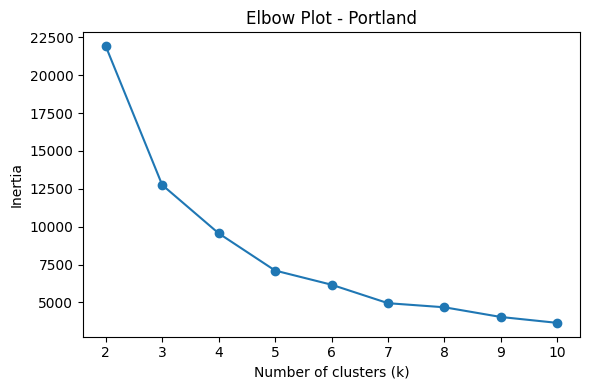

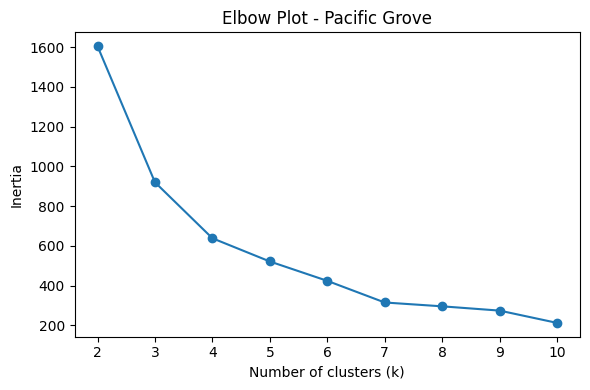

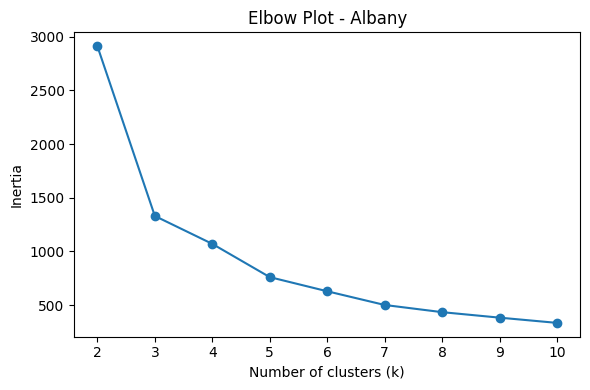

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/lib/python3.10/site-

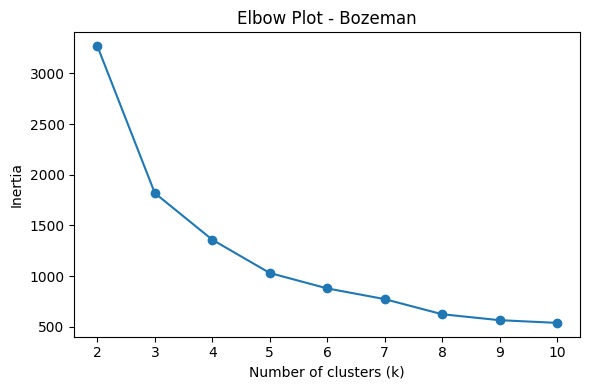

In [54]:
for city, X in city_pca2.items():
    plot_elbow(X, city)

## Run K-Means + silhouette

In [55]:
def run_kmeans(X, city_name, k):
    km = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    labels = km.fit_predict(X)
    
    sil = silhouette_score(X, labels)
    print(f"{city_name} — Silhouette Score (k={k}): {sil:.3f}")
    
    return km, labels, sil

In [56]:
cluster_results = {}

chosen_k = {
    "Portland": 3,
    "Pacific Grove": 3,
    "Albany": 3,
    "Bozeman": 3
}

for city, X in city_pca2.items():
    km, labels, sil = run_kmeans(X, city, chosen_k[city])
    cluster_results[city] = {
        "model": km,
        "labels": labels,
        "silhouette": sil
    }

Portland — Silhouette Score (k=3): 0.568
Pacific Grove — Silhouette Score (k=3): 0.443
Albany — Silhouette Score (k=3): 0.583
Bozeman — Silhouette Score (k=3): 0.453


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/extmath.p

## Cluster scatter plot

In [57]:
def plot_clusters(X, labels, city_name):
    plt.figure(figsize=(6, 4))
    plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=20)
    plt.title(f"K-Means Clusters - {city_name}")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.tight_layout()
    plt.show()

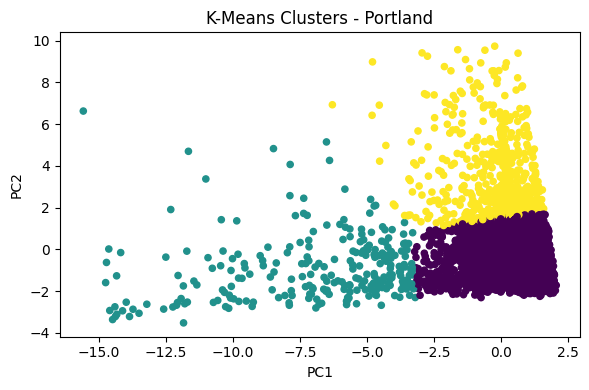

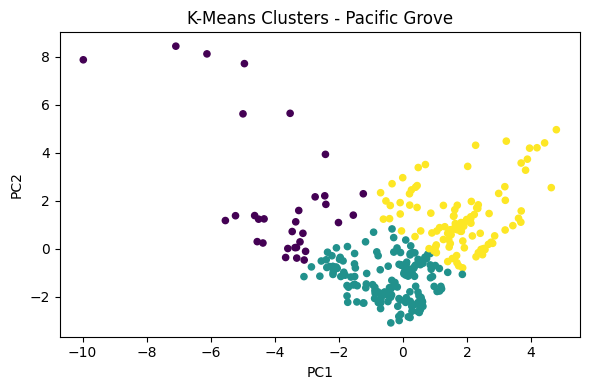

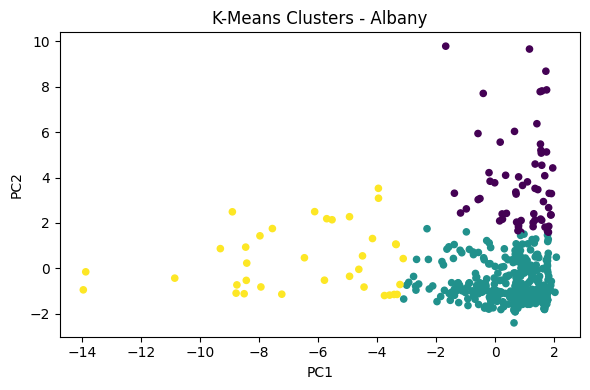

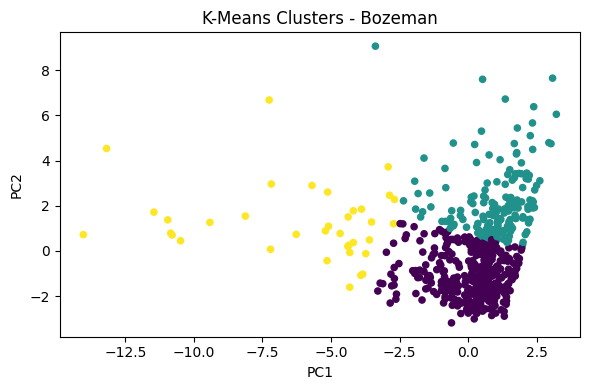

In [58]:
for city, X in city_pca2.items():
    labels = cluster_results[city]["labels"]
    plot_clusters(X, labels, city)

##  K-Means interpretations

### Portland (k = 3, silhouette ~ 0.57)

The Portland clusters separate pretty cleanly along the two PCA axes. One group sits on the far left of PC1, which corresponds to listings that score low on the “size + review” dimensions - these are usually smaller, lower-priced units with more modest guest ratings. Another cluster occupies the right side of the plot, which lines up with the larger, better-reviewed listings. The third cluster falls in the middle, representing fairly average listings that don’t stand out on either size or review quality. The separation here is pretty decent, which matches the higher silhouette score.



### Pacific Grove (k = 3, silhouette ~ 0.44)

Pacific Grove’s clusters are a little looser. One cluster shows up on the left, which seems to capture the smaller or lower-rated listings. The central cluster holds mid-range properties, while the right-side group contains the bigger/higher-rated listings. The silhouette score is lower, which makes sense - the listings in this city are more tightly packed and less varied overall, so clusters overlap more.



### Albany (k = 3, silhouette ~ 0.58)

Albany has pretty clear separation: a left-side cluster with the smaller/cheaper listings, a main central cluster that forms the bulk of the market, and a right-side cluster of higher-reviewed or slightly larger units. The silhouette score is the best among the four cities, which fits the plot - the clusters are fairly distinct and show minimal overlap.



### Bozeman (k = 3, silhouette ~ 0.45)

Bozeman shows a pattern similar to Portland and Albany, but the boundaries between clusters are blurrier. One cluster is located to the left (smaller or lower-rated homes), another takes up the center (mid-range listings), and the rightmost cluster captures the higher-rated or larger properties. The silhouette score reflects the moderate separation - it’s not bad, but not as crisp as Albany or Portland.



### Short cross-city comparison for K-Means

Across all four cities, the clusters generally reflect the same underlying structure: smaller and lower-rated listings fall on one side of the PCA space, larger or better-reviewed listings fall on the other, and mid-range listings fill the middle. The best separation appears in Albany and Portland, which also have the highest silhouette scores. Pacific Grove and Bozeman have more overlap between groups, likely because their listing markets are smaller and less diverse. Despite differences in scale, the overall cluster shapes across cities are surprisingly consistent.
